In [1]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_excel('all_patients.xlsx')
#df = df.set_index(['subjid'])
df = df.drop('number_annotations', axis = 1)
#df = df[df.shape_VoxelVolume > 125]
df.drop(df[df['labels'] == 3].index, inplace = True) ## dropping label of the call OTHERS
#df = df.set_index(['subjid', 'label'])
df = df.iloc[:,:2].join(df.iloc[:, -4:])
df

,subjid,label,Age,F,M,labels
0,Oslo01,1,58,0,1,0
1,Oslo01,2,58,0,1,0
2,Oslo02,2,50,1,0,1
3,Oslo02,3,50,1,0,1
4,Oslo02,4,50,1,0,1
...,...,...,...,...,...,...
2423,Stan_328,16,53,0,1,1
2424,Stan_338,1,42,1,0,1
2425,Stan_338,2,42,1,0,1
2426,Stan_338,3,42,1,0,1


## Total patietns in the study

In [20]:
#melanoma
melanoma = df[df['labels']==0]

unique_count_female = melanoma[melanoma['F'] == 1]['subjid'].nunique() ## number of feamales with melanoma in teh study
print('melanoma females', unique_count_female)

unique_count_male = melanoma[melanoma['M'] == 1]['subjid'].nunique() ## number of feamales with melanoma in teh study
print('melanoma males',unique_count_male)

print('mean age', melanoma['Age'].mean()) ## mean of patietns in the whole study
print('print age range',melanoma['Age'].min(), melanoma['Age'].max())

print('total number of lung tumors',len(melanoma[melanoma['F'] == 1]) + len(melanoma[melanoma['F'] == 0]))

13
13
32 86
68


In [22]:
#breast
breast = df[df['labels']==2]

unique_count_female = breast[breast['F'] == 1]['subjid'].nunique() ## number of feamales with breast in teh study
print('melanoma females', unique_count_female)

unique_count_male = breast[breast['M'] == 1]['subjid'].nunique() ## number of feamales with melanoma in teh study
print('melanoma males', unique_count_male)

print('mean age', breast['Age'].mean())## mean of patietns in the whole study
print('print age range',breast['Age'].min(), breast['Age'].max())

print('total number of tumors',len(breast[breast['F'] == 1]) + len(breast[breast['F'] == 0]))

29
1
441


In [24]:
## lung
lung = df[df['labels']==1]

unique_count_female = lung[lung['F'] == 1]['subjid'].nunique() ## number of feamales with lung in teh study
print(unique_count_female)

unique_count_male = lung[lung['F'] == 0]['subjid'].nunique() ## number of feamales with lung in teh study
print(unique_count_male)

print(lung['Age'].mean())## mean of patietns in the whole study
print(lung['Age'].min(), breast['Age'].max())

print(len(lung[lung['F'] == 1]) + len(lung[lung['F'] == 0]))

83
51
61.533947065592635
32 90
1738


In [17]:
#lung
lung = df[df['labels']==1]

unique_count_female = lung[lung['F'] == 1]['subjid'].nunique() ## number of feamales with lung in teh study
print(unique_count_female)

unique_count_male = lung[lung['F'] == 0]['subjid'].nunique() ## number of feamales with lung in teh study
print(unique_count_male)

print(lung['Age'].mean())## mean of patietns in the whole study
print(lung['Age'].min(), breast['Age'].max())

print(len(lung[lung['F'] == 1]) + len(lung[lung['F'] == 0]))

83
51
61.533947065592635
32 90
1738


In [2]:
df = pd.read_excel('all_patients.xlsx')
#df = df.set_index(['subjid'])
df = df.drop('number_annotations', axis = 1)
df = df[df.shape_VoxelVolume > 125]
df.drop(df[df['labels'] == 3].index, inplace = True) ## dropping label of the call OTHERS
#df = df.set_index(['subjid', 'label'])
df = df.iloc[:,:2].join(df.iloc[:, -4:])
lung = df[df['labels']==1]
breast = df[df['labels']==2]
melanoma = df[df['labels']==0]

In [10]:
#df[df['labels']  == 0]

df['labels'] = df['labels'].replace(0, 'Melanoma')
df['labels'] = df['labels'].replace(1, 'Lung')
df['labels'] = df['labels'].replace(2, 'Breast')

In [11]:
from collections import Counter
X = df.iloc[:, :-1] #leaving the sex and age features out for now
y = df.iloc[:, -1:]
print(Counter(y.values.ravel()))

Counter({'Lung': 321, 'Breast': 76, 'Melanoma': 41})


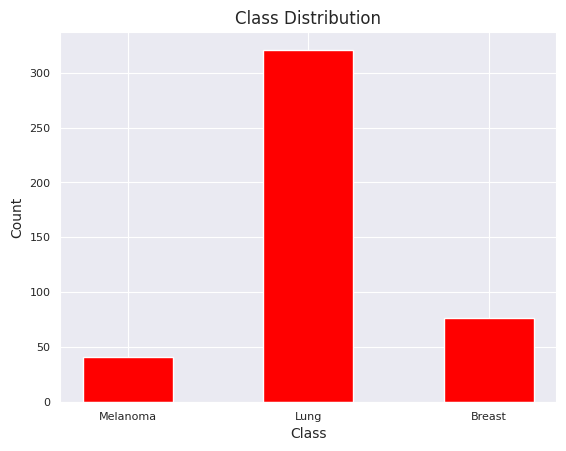

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have already defined X and y

# Count the occurrences of each class
class_counts = Counter(y.values.ravel())

# Extract the class labels and their respective counts
classes = class_counts.keys()
counts = class_counts.values()

# Create a bar plot
plt.bar(classes, counts, color='red', width=0.5)

# Set plot title and axis labels
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Set the font size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.show()

In [29]:
print('total number of melanoma tumors',len(melanoma[melanoma['F'] == 1]) + len(melanoma[melanoma['F'] == 0]))
print('total number of lung tumors',len(lung[lung['F'] == 1]) + len(lung[lung['F'] == 0]))
print('total number of breast tumors',len(breast[breast['F'] == 1]) + len(breast[breast['F'] == 0]))

total number of melanoma tumors 41
total number of lung tumors 321
total number of breast tumors 76
